In [59]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import pickle
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from scipy import signal
from scipy import ndimage
import nrrd
import PIL

In [2]:
fname = '/work/jprieto/data/remote/EGower/jprieto/trachoma_normals_healthy_sev123_05182021_stack_32_384_test_10042021'
df = pd.read_csv(fname + '_prediction.csv')
df

img  \
0    /work/jprieto/data/remote/EGower/jprieto/trach...   
1    /work/jprieto/data/remote/EGower/jprieto/trach...   
2    /work/jprieto/data/remote/EGower/jprieto/trach...   
3    /work/jprieto/data/remote/EGower/jprieto/trach...   
4    /work/jprieto/data/remote/EGower/jprieto/trach...   
..                                                 ...   
398  /work/jprieto/data/remote/EGower/jprieto/trach...   
399  /work/jprieto/data/remote/EGower/jprieto/trach...   
400  /work/jprieto/data/remote/EGower/jprieto/trach...   
401  /work/jprieto/data/remote/EGower/jprieto/trach...   
402  /work/jprieto/data/remote/EGower/jprieto/trach...   

                                                  orig  class  severity_class  \
0    /work/jprieto/data/remote/EGower/jprieto/eyes_...      2               3   
1    /work/jprieto/data/remote/EGower/jprieto/eyes_...      2               3   
2    /work/jprieto/data/remote/EGower/jprieto/eyes_...      2               3   
3    /work/jprieto/data/remote/EGower/jprieto/eyes_...      2               3   
4    /work/jprieto/data/remote/EGower/jprieto/eyes_...      2               3   
..                                                 ...    ...             ...   
398  /work/jprieto/data/remote/EGower/jprieto/eyes_...      1               1   
399  /work/jprieto/data/remote/EGower/jprieto/eyes_...      1               1   
400  /work/jprieto/data/remote/EGower/jprieto/eyes_...      1               1   
401  /work/jprieto/data/remote/EGower/jprieto/eyes_...      1               1   
402  /work/jprieto/data/remote/EGower/jprieto/eyes_...      1               1   

     prediction  
0           1.0  
1           1.0  
2           1.0  
3           1.0  
4           1.0  
..          ...  
398         1.0  
399         1.0  
400         1.0  
401         1.0  
402         1.0  

[403 rows x 5 columns]

In [3]:
img = PIL.Image.open(df.loc[0]["orig"])
img_tf = tf.keras.preprocessing.image.img_to_array(img)

In [47]:
print.shape)

output = tf.image.random_crop(img_tf, size=(448, 448, 3))

(3006, 3006, 3)


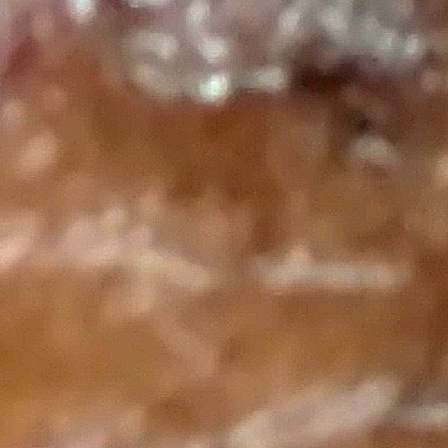

In [49]:
out_pil = tf.keras.preprocessing.image.array_to_img(output)
out_pil

In [106]:
zoom_factor = np.random.uniform(low=0.8, high=1.2)
print(zoom_factor)
out_zoom = ndimage.zoom(img_tf, zoom=[zoom_factor, zoom_factor, 1], order=1)

1.10855842451507


In [107]:
out_zoom.shape

(3332, 3332, 3)

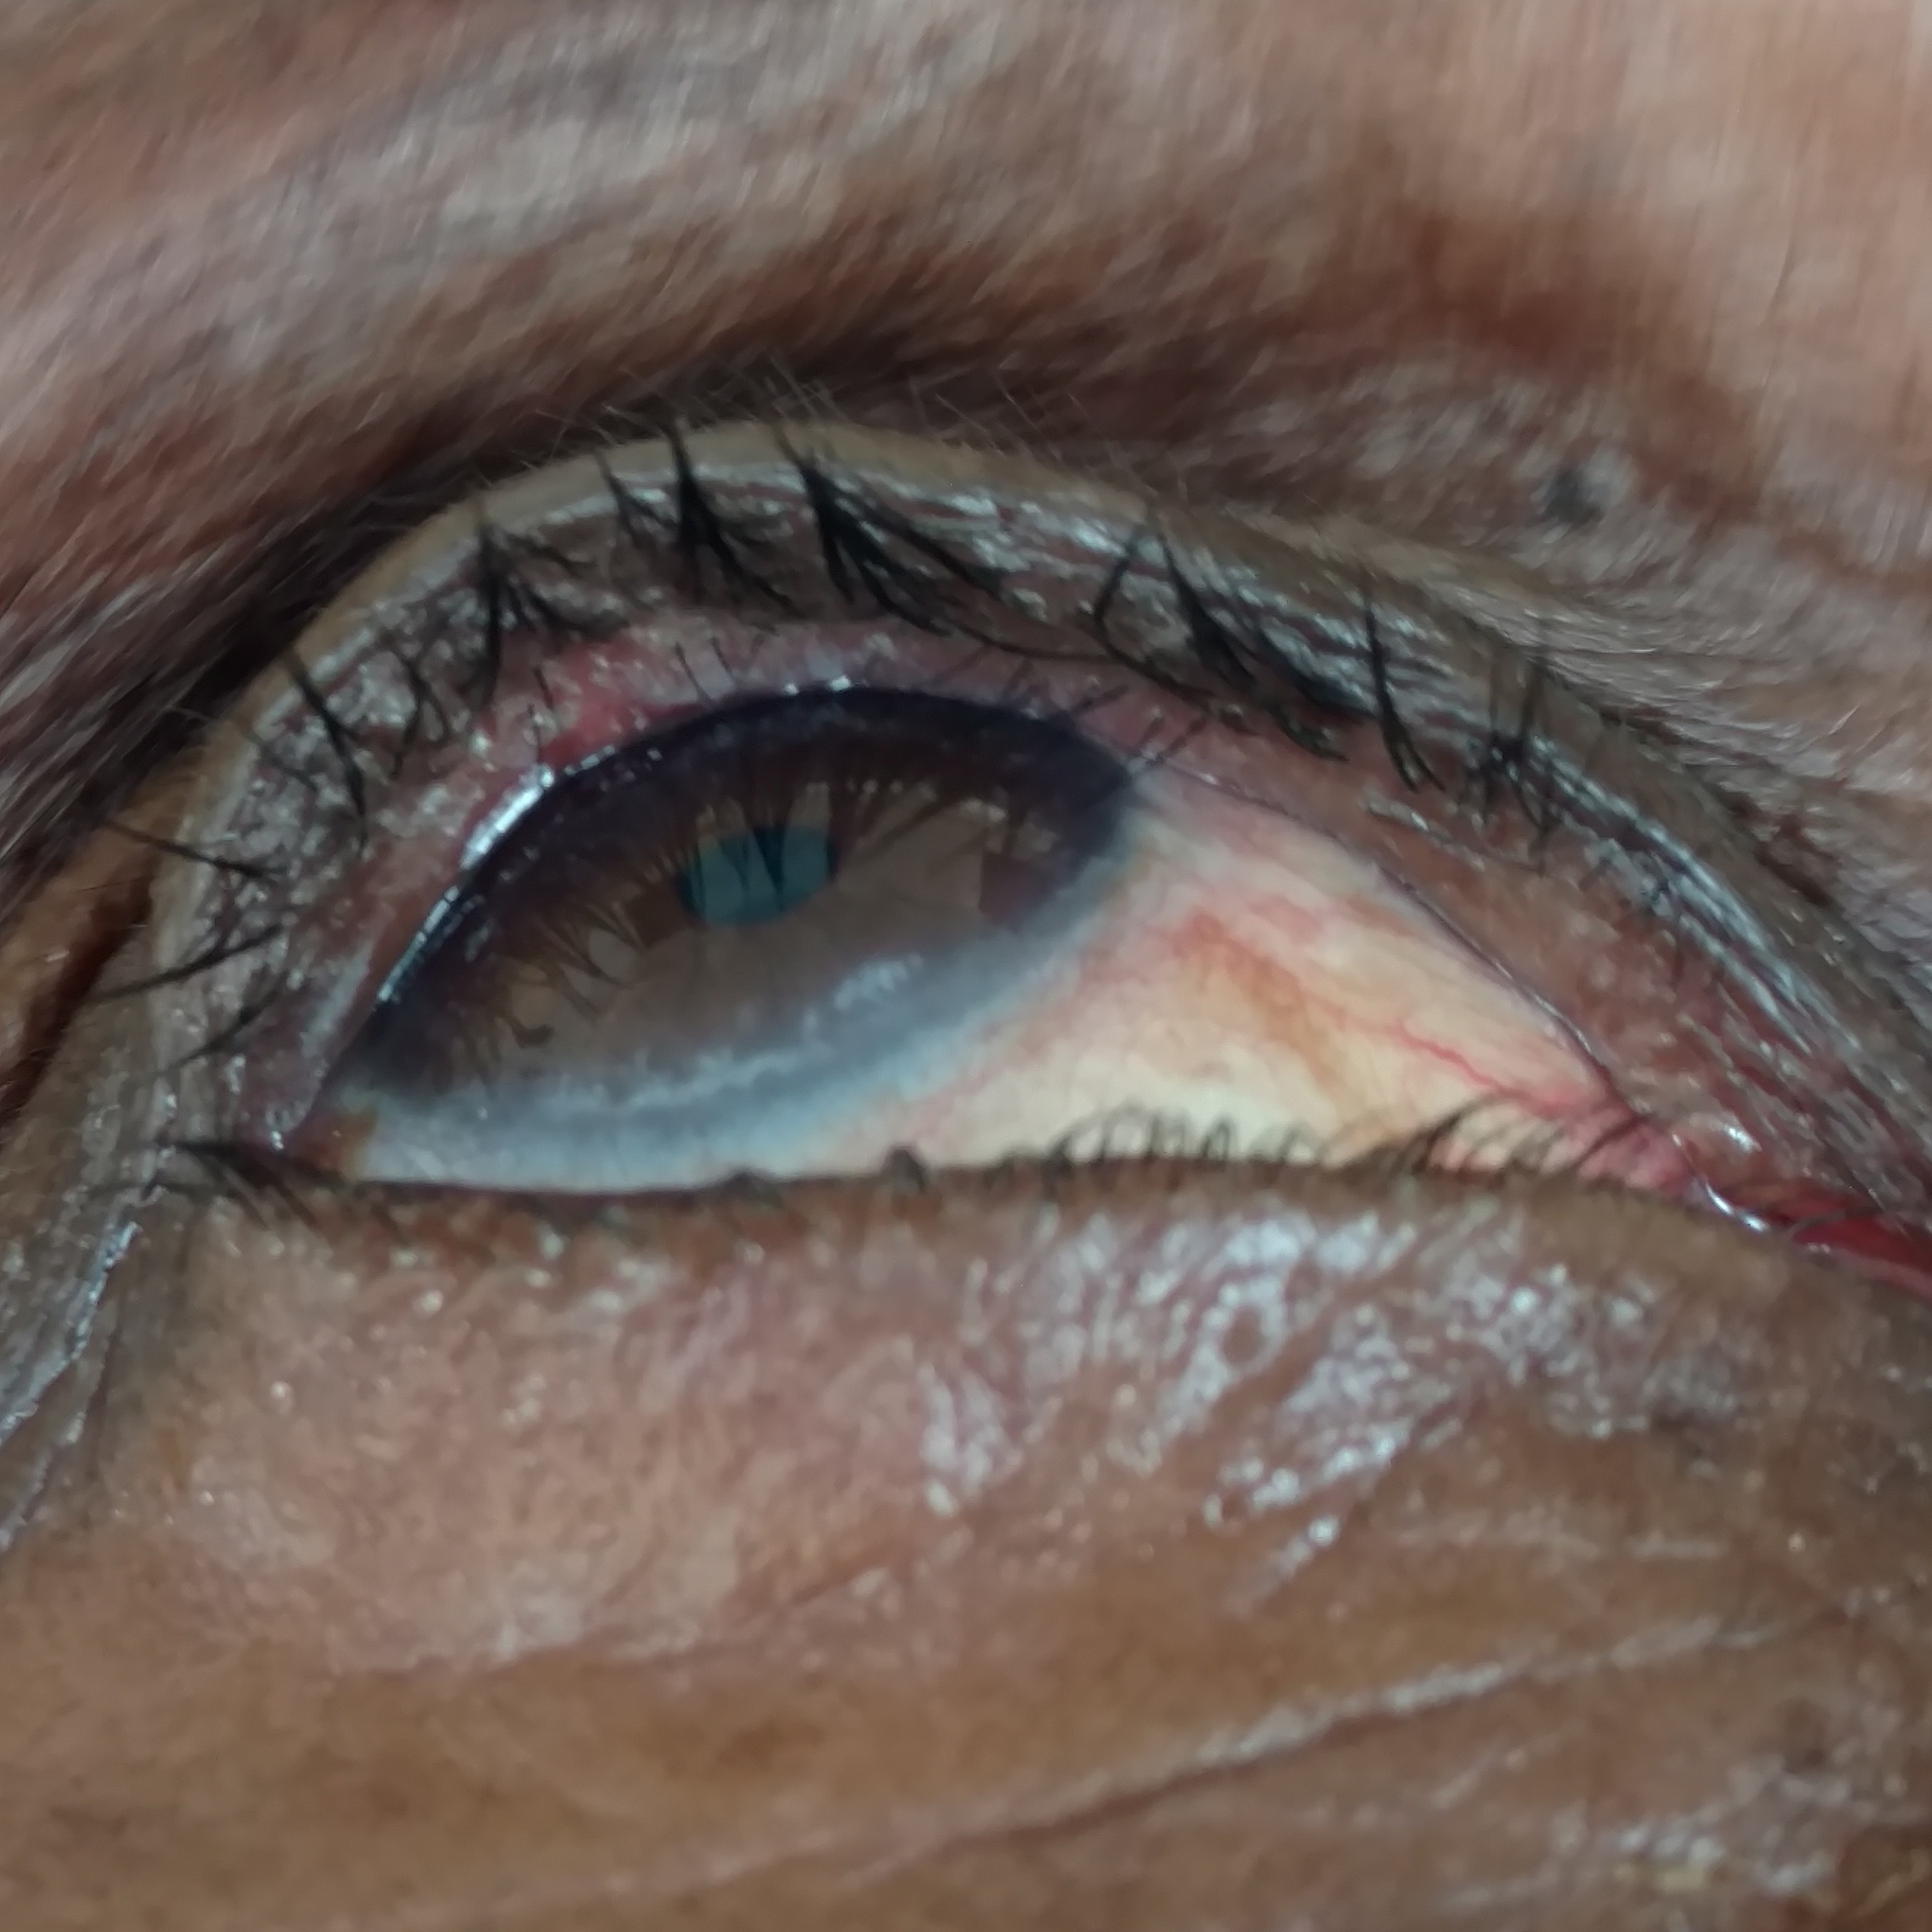

In [94]:
out_zoom_pil = tf.keras.preprocessing.image.array_to_img(out_zoom)
out_zoom_pil